**DS220 Project2**
Data Analysis with Python


**Individual**: Bingjie Yan


**Topic**: Analysis of Spotify's popular song trends

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import datetime
import numpy as np
import pandas as pd

❗**6** **Questions：**

1.   What is the distribution of speechiness in the top songs, and does higher speechiness influence stream count?
2.   How does the popularity of songs vary across different music genres?

1.   Has the average popularity of top songs changed over time
2.   Which artists appear most frequently among the top 1000 most played songs, and what patterns can be observed in their musical features?

1.   Do longer or shorter songs tend to get more streams on Spotify?
2.   Are there noticeable differences in musical features (e.g., danceability, energy, acousticness) between songs released before and after 2015?











In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/ds220/spotify_top_1000_tracks.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/ds220/cleaned_top10s.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   track_name    1000 non-null   object 
 1   artist        1000 non-null   object 
 2   album         1000 non-null   object 
 3   release_date  1000 non-null   object 
 4   popularity    1000 non-null   int64  
 5   spotify_url   1000 non-null   object 
 6   id            1000 non-null   object 
 7   duration_min  1000 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


**Question 1**：What is the distribution of speechiness in the top songs, and does higher speechiness influence stream count?

 **Analysis** **Result**: **Relationship Between Speechiness and Popularity**
1. Speechiness Distribution
Most songs have low speechiness values, primarily between 0–20, indicating that these popular songs are melody-driven rather than spoken or rap-style.

Very few songs have extremely high speechiness.

2. Relationship with Popularity
The scatter plot shows no obvious trend, suggesting that different levels of speechiness do not significantly affect a song’s popularity.

The calculated Pearson correlation coefficient is -0.041, which is close to zero, meaning:

🎧 There is virtually no linear relationship between speechiness and song popularity.




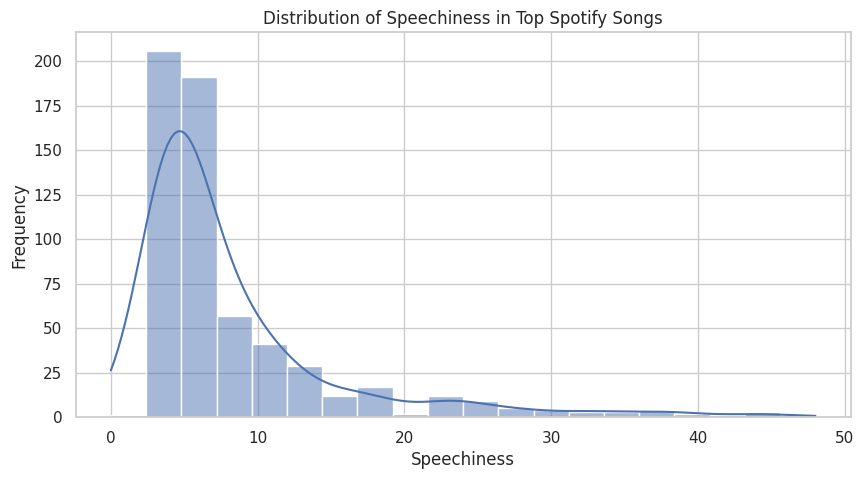

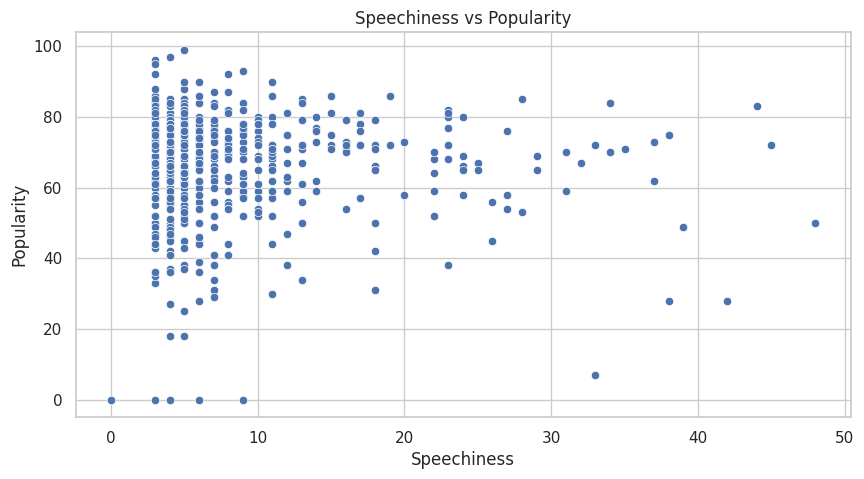

Correlation between speechiness and popularity: -0.041


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/My Drive/ds220/cleaned_top10s.csv')
sns.set(style="whitegrid")
df_speech = df[['spch', 'pop']].copy()
plt.figure(figsize=(10, 5))
sns.histplot(df_speech['spch'], bins=20, kde=True)
plt.title("Distribution of Speechiness in Top Spotify Songs")
plt.xlabel("Speechiness")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_speech, x='spch', y='pop')
plt.title("Speechiness vs Popularity")
plt.xlabel("Speechiness")
plt.ylabel("Popularity")
plt.show()
correlation = df_speech['spch'].corr(df_speech['pop'])
print(f"Correlation between speechiness and popularity: {correlation:.3f}")


**Question 2：** How does the popularity of songs vary across different music genres?

**Summary：**Niche genres such as escape room and brostep surprisingly rank higher in average popularity than mainstream genres, suggesting strong engagement within specific audiences.



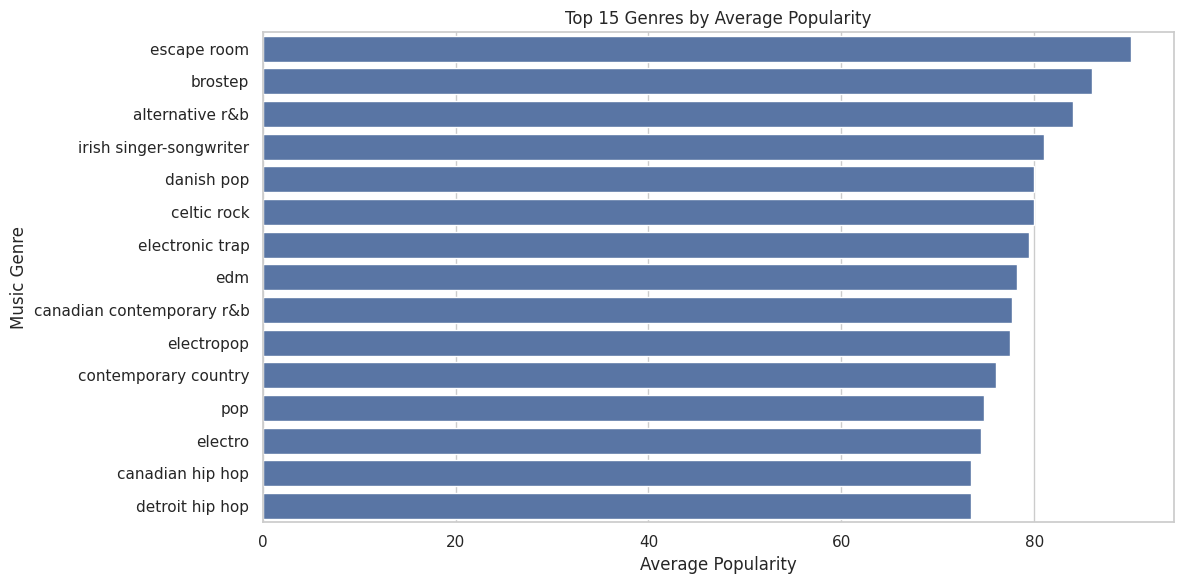

Total number of genres: 50
Range of average popularity across genres: 72.0


In [ ]:
pd.read_csv('/content/drive/My Drive/ds220/cleaned_top10s.csv')
df_genre = df[['top genre', 'pop']].copy()
genre_popularity = df_genre.groupby('top genre')['pop'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_popularity.head(15).values, y=genre_popularity.head(15).index)
plt.title("Top 15 Genres by Average Popularity")
plt.xlabel("Average Popularity")
plt.ylabel("Music Genre")
plt.tight_layout()
plt.show()

print("Total number of genres:", df_genre['top genre'].nunique())
print("Range of average popularity across genres:", genre_popularity.max() - genre_popularity.min())


**Question** **3**: Has the average popularity of top songs changed over

**Analysis** **Result**: Has the Average Popularity of Top Songs Changed Over Time?
**1**. Analysis Range
The dataset covers 9 years, from 2010 to 2019.

The maximum change in average popularity over these years is about 22.5 points.

**2**. **Trend** **Observation**
From 2010 to 2015, the average popularity remained relatively stable, fluctuating between 62 and 68.

A noticeable increase began in 2016, with popularity peaking in 2019.

**3**. **Possible Interpretation**
This trend may suggest that:

  Newer musical styles have become more favored by listeners;

  *   Newer musical styles have become more favored by listeners;

  *    Spotify’s algorithm may have contributed to greater exposure of trending songs;

  *   Or, the dataset may be biased toward more popular recent songs.


**Summary：Since** 2016, the average popularity of top Spotify songs has increased noticeably, peaking in 2019 — indicating a rising trend in overall music popularity in recent years.

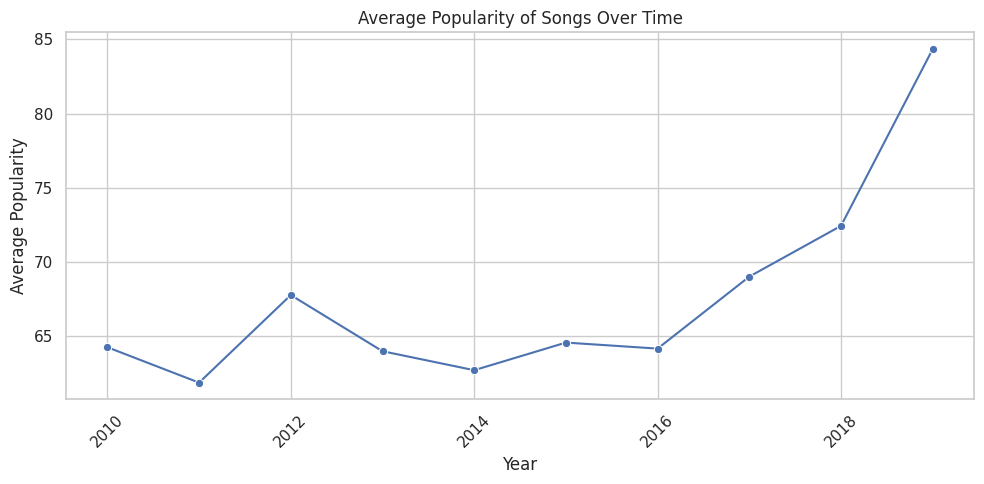

Year range: 9
Popularity fluctuation: 22.49


In [ ]:
pd.read_csv('/content/drive/My Drive/ds220/cleaned_top10s.csv')
df_year = df[['year', 'pop']].copy()

yearly_popularity = df_year.groupby('year')['pop'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=yearly_popularity, x='year', y='pop', marker='o')
plt.title("Average Popularity of Songs Over Time")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

year_range = yearly_popularity['year'].max() - yearly_popularity['year'].min()
pop_fluctuation = yearly_popularity['pop'].max() - yearly_popularity['pop'].min()

print("Year range:", year_range)
print("Popularity fluctuation:", round(pop_fluctuation, 2))


**Question 4:** Which artists appear most frequently among the top 1000 most played songs, and what patterns can be observed in their musical features?

**summary：**Katy Perry, Justin Bieber, and Rihanna appear most frequently in the top songs. Their audio features show strong energy, danceability, and popularity — yet each maintains distinct stylistic traits.

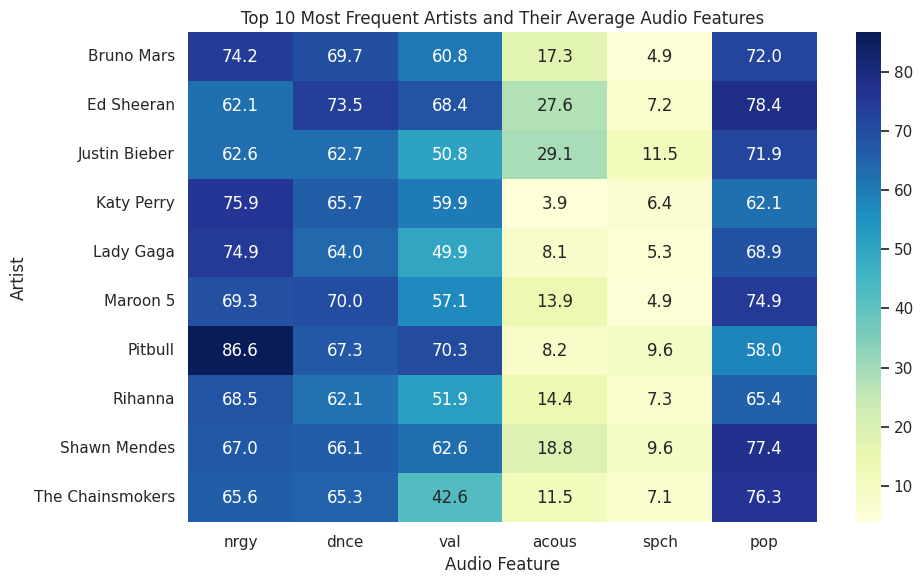

artist
Katy Perry          17
Justin Bieber       16
Rihanna             15
Maroon 5            15
Lady Gaga           14
Bruno Mars          13
Pitbull             11
Ed Sheeran          11
Shawn Mendes        11
The Chainsmokers    11
Name: count, dtype: int64


In [ ]:
pd.read_csv('/content/drive/My Drive/ds220/cleaned_top10s.csv')

columns_of_interest = ['artist', 'nrgy', 'dnce', 'val', 'acous', 'spch', 'pop']
df_artist_features = df[columns_of_interest].copy()

top_artists = df_artist_features['artist'].value_counts().head(10)
top_artist_names = top_artists.index.tolist()

df_top_artists = df_artist_features[df_artist_features['artist'].isin(top_artist_names)]

artist_feature_means = df_top_artists.groupby('artist').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(artist_feature_means, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Top 10 Most Frequent Artists and Their Average Audio Features")
plt.xlabel("Audio Feature")
plt.ylabel("Artist")
plt.tight_layout()
plt.show()

print(top_artists)


**Question 5:** Do longer or shorter songs tend to get more streams on Spotify?
**Analysis Resul：**

1. Scatter Plot Insight

  *  Most top songs have durations between 180 and 240 seconds (3 to 4 minutes).
  *  Within this range, popularity values are spread out evenly, showing no strong upward or downward trend based on song length.

2. Correlation Analysis


  *   The Pearson correlation coefficient between duration and popularity is -0.104.
  *   This value is very close to zero, indicating that:

      There is virtually no significant linear relationship between song length and popularity — with a slightly negative but negligible trend.




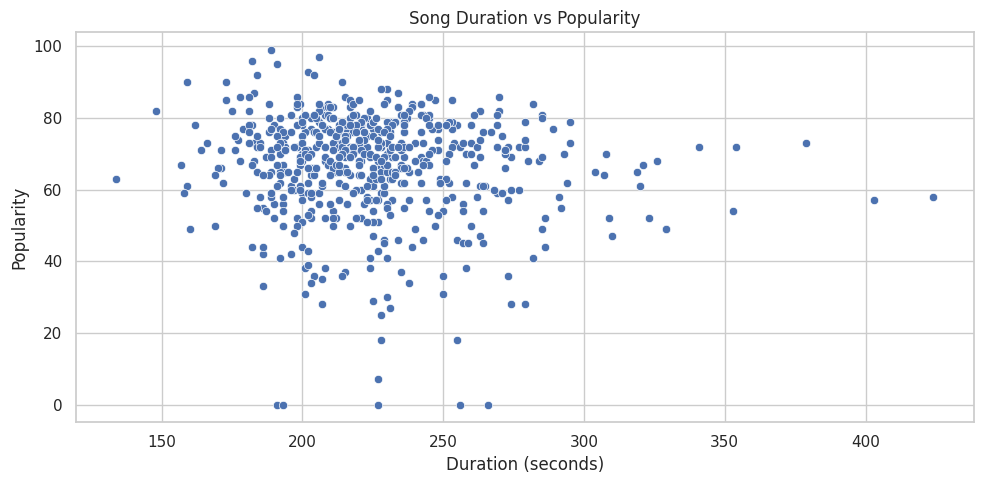

Correlation between duration and popularity: -0.104


In [ ]:
pd.read_csv('/content/drive/My Drive/ds220/cleaned_top10s.csv')

df_duration = df[['dur', 'pop']].copy()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_duration, x='dur', y='pop')
plt.title("Song Duration vs Popularity")
plt.xlabel("Duration (seconds)")
plt.ylabel("Popularity")
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = df_duration['dur'].corr(df_duration['pop'])
print(f"Correlation between duration and popularity: {correlation:.3f}")


**Question 6:** Are there noticeable differences in musical features (e.g., danceability, energy, acousticness) between songs released before and after 2015?

**Summary：** Compared to pre-2015 songs, post-2015 hits are slightly lower in energy and valence (happiness), but show higher danceability, acousticness, and speechiness — suggesting a shift toward more danceable, expressive, and lyric-driven styles.



<Figure size 1000x600 with 0 Axes>

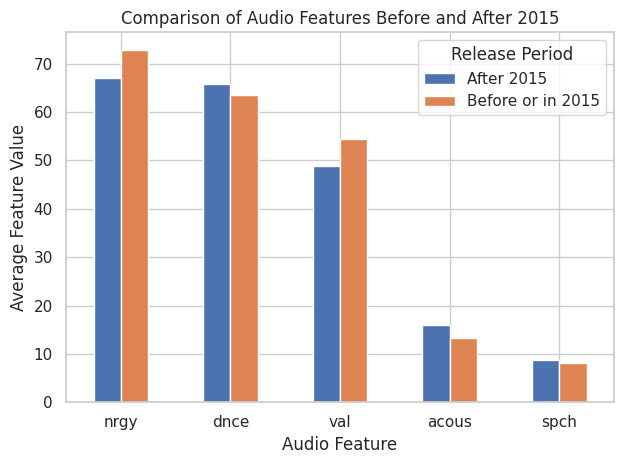

Average Feature Differences (After 2015 - Before 2015):
nrgy    -5.876309
dnce     2.255406
val     -5.731887
acous    2.786536
spch     0.713120
dtype: float64


In [ ]:
pd.read_csv('/content/drive/My Drive/ds220/cleaned_top10s.csv')

df['era'] = df['year'].apply(lambda x: 'After 2015' if x > 2015 else 'Before or in 2015')

feature_cols = ['nrgy', 'dnce', 'val', 'acous', 'spch']
df_era = df[feature_cols + ['era']]

era_means = df_era.groupby('era').mean()

plt.figure(figsize=(10, 6))
era_means.T.plot(kind='bar')
plt.title("Comparison of Audio Features Before and After 2015")
plt.ylabel("Average Feature Value")
plt.xlabel("Audio Feature")
plt.xticks(rotation=0)
plt.legend(title="Release Period")
plt.tight_layout()
plt.show()

feature_diff = era_means.loc['After 2015'] - era_means.loc['Before or in 2015']
print("Average Feature Differences (After 2015 - Before 2015):")
print(feature_diff)
